<a href="https://colab.research.google.com/github/dbeniteze/autoencoder_convolucional/blob/master/conv_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install keras==2.3.1

%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

TensorFlow 2.x selected.
Found GPU at: /device:GPU:0


In [0]:
# Larger CNN for the MNIST Dataset
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, Reshape
from keras.layers import Flatten, BatchNormalization
from keras.layers import LeakyReLU
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255


In [53]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format
LF = (5,5)
x = Conv2D(16, LF, activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, LF, activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, LF, activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3,3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 14, 14, 8)         3208      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 7, 7, 8)           1608      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 4, 4, 8)           0  

In [54]:

autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.2169 - val_loss: 0.1678
Epoch 2/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.1580 - val_loss: 0.1479
Epoch 3/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.1430 - val_loss: 0.1362
Epoch 4/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.1345 - val_loss: 0.1303
Epoch 5/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.1288 - val_loss: 0.1232
Epoch 6/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.1247 - val_loss: 0.1247
Epoch 7/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.1218 - val_loss: 0.1217
Epoch 8/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.1191 - val_loss: 0.1163
Epoch 9/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.1169 - val_loss: 0.1185
Epoch

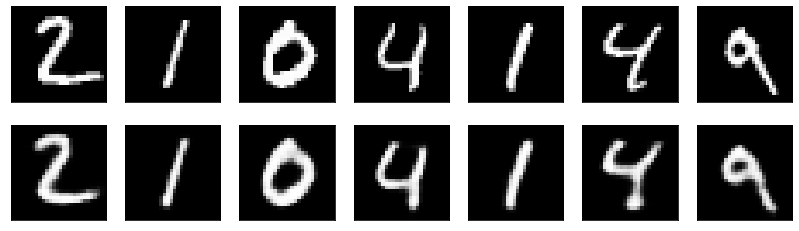

In [55]:
#visualizacion de la decodificacion
decoded_imgs = autoencoder.predict(X_test)

n = 7
plt.figure(figsize=(14, 4))
for i in range(n):
    i = i + 1
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()